In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
psych_file_path = "C:/Users/SAPTARSHI/Downloads/psycological factors.xlsx"  
df_psychological = pd.read_excel(psych_file_path)

In [3]:
# Define independent variables (X) and target variable (y)
X_psychological = df_psychological.drop(columns=["Have you ever crossed the street during a red light?"])
y_psychological = df_psychological["Have you ever crossed the street during a red light?"]


In [5]:
# Standardize continuous variables
scaler = StandardScaler()
X_psychological_scaled = scaler.fit_transform(X_psychological)

In [6]:
# Add constant for intercept
X_const_psychological = sm.add_constant(X_psychological_scaled)

In [7]:
# Split dataset into training and testing sets
X_train_psy, X_test_psy, y_train_psy, y_test_psy = train_test_split(
    X_const_psychological, y_psychological, test_size=0.2, random_state=42
)

In [8]:
# Train logistic regression model using statsmodels
logit_model_psy = sm.Logit(y_train_psy, X_train_psy)
result_psy = logit_model_psy.fit(disp=0)

In [9]:
# Get feature importance (coefficients) and calculate odds ratios
coefficients_psy = result_psy.params
odds_ratios_psy = np.exp(coefficients_psy)
p_values_psy = result_psy.pvalues
conf_intervals_psy = result_psy.conf_int()
conf_intervals_psy.columns = ['2.5% CI', '97.5% CI']

In [10]:
# Create a DataFrame to display feature importance, odds ratios, p-values, and confidence intervals
importance_df_psy = pd.DataFrame(
    {
        "Feature": X_psychological.columns.insert(0, 'Intercept'),
        "Coefficient": coefficients_psy,
        "Odds_Ratio": odds_ratios_psy,
        "P-Value": p_values_psy,
        "2.5% CI": conf_intervals_psy['2.5% CI'],
        "97.5% CI": conf_intervals_psy['97.5% CI']
    }
).sort_values(by="Odds_Ratio", ascending=False)

In [11]:
# Print feature importance, odds ratios, p-values, and confidence intervals
print("Feature Importance, Odds Ratios, P-Values, and Confidence Intervals:")
print(importance_df_psy)


Feature Importance, Odds Ratios, P-Values, and Confidence Intervals:
                                                 Feature  Coefficient  \
x4     Do you get into physical fights more frequentl...     0.294970   
x5     Have you ever been so angry that you broke som...     0.256747   
x2     Do you openly express disagreement with your f...     0.079014   
x1     How often do your friends describe you as argu...    -0.190214   
x3     Do you  find yourself getting into arguments w...    -0.484743   
const                                          Intercept    -1.305259   

       Odds_Ratio       P-Value   2.5% CI  97.5% CI  
x4       1.343086  7.858037e-04  0.122792  0.467148  
x5       1.292718  6.756165e-03  0.070965  0.442529  
x2       1.082219  4.642661e-01 -0.132595  0.290623  
x1       0.826782  8.512981e-02 -0.406756  0.026328  
x3       0.615855  1.716184e-05 -0.705747 -0.263740  
const    0.271102  4.243000e-36 -1.509188 -1.101329  


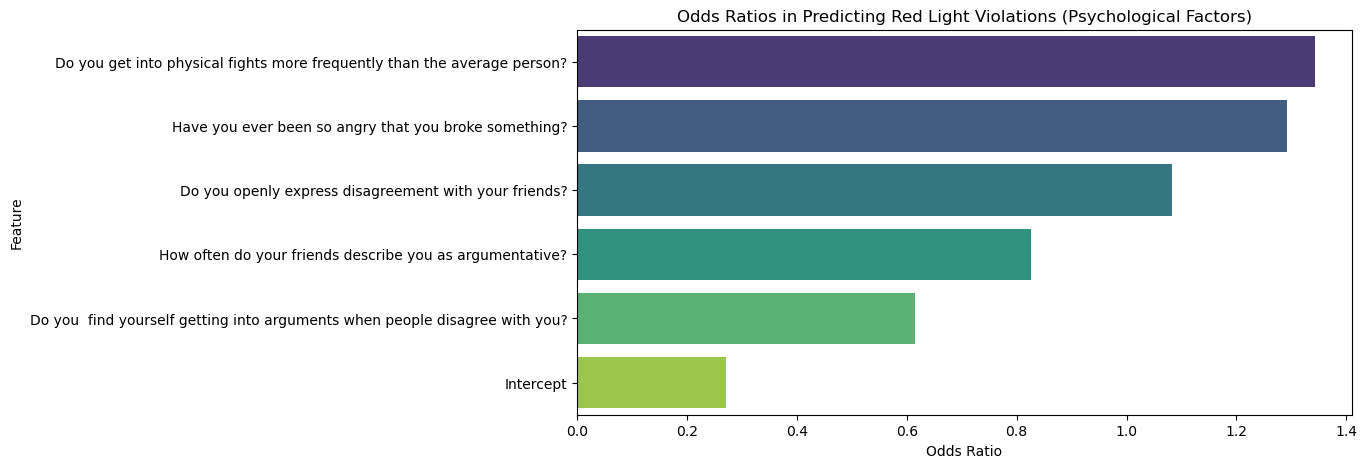

In [12]:
# Visualization of odds ratios
plt.figure(figsize=(10, 5))
sns.barplot(x=importance_df_psy["Odds_Ratio"], y=importance_df_psy["Feature"], palette="viridis")
plt.xlabel("Odds Ratio")
plt.ylabel("Feature")
plt.title("Odds Ratios in Predicting Red Light Violations (Psychological Factors)")
plt.show()


In [15]:
# Print feature importance and odds ratios
print("Feature Importance and Odds Ratios:")
print(importance_df_psych)

Feature Importance and Odds Ratios:
                                             Feature  Coefficient  Odds_Ratio
3  Do you get into physical fights more frequentl...     0.793474    2.211065
4  Have you ever been so angry that you broke som...     0.570497    1.769147
1  Do you openly express disagreement with your f...     0.101522    1.106854
0  How often do your friends describe you as argu...    -0.227918    0.796189
2  Do you  find yourself getting into arguments w...    -0.648795    0.522675


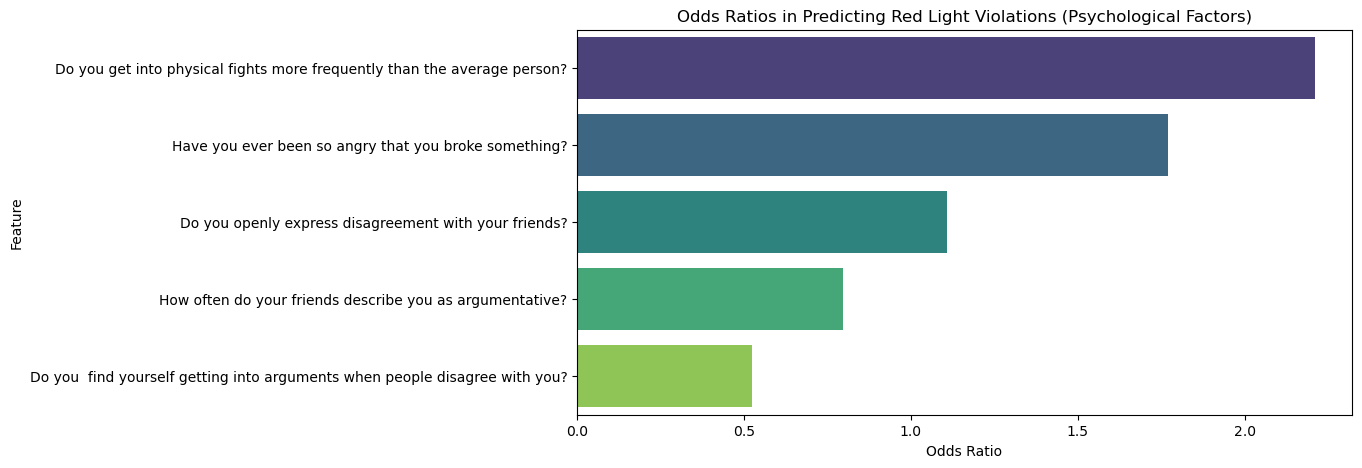

In [16]:
# Visualization of odds ratios
plt.figure(figsize=(10, 5))
sns.barplot(x=importance_df_psych["Odds_Ratio"], y=importance_df_psych["Feature"], palette="viridis")
plt.xlabel("Odds Ratio")
plt.ylabel("Feature")
plt.title("Odds Ratios in Predicting Red Light Violations (Psychological Factors)")
plt.show()